# Time Series Analysis

In [10]:
import pandas as pd
import numpy as np
pd.set_option('max_columns', 7,'display.expand_frame_repr', True, # 'max_rows', 10, 
    'max_colwidth', 12, 'max_rows', 10, #'precision', 2
)#, 'width', 45)
pd.set_option('display.width', 65)

In [ ]:
pd.set_option(#'max_columns', 4,
    'max_rows', 10)
from io import StringIO
def txt_repr(df, width=40, rows=None):
    buf = StringIO()
    rows = rows if rows is not None else pd.options.display.max_rows
    num_cols = len(df.columns)
    with pd.option_context('display.width', 100):
        df.to_string(buf=buf, max_cols=num_cols, max_rows=rows,line_width=width)
        out = buf.getvalue()
        for line in out.split('\n'):
            if len(line) > width or line.strip().endswith('\\'):
                break
        else:
            return out
        done = False
        while not done:
            buf = StringIO()
            df.to_string(buf=buf, max_cols=num_cols, max_rows=rows,line_width=width)
            for line in buf.getvalue().split('\n'):
                if line.strip().endswith('\\'):
                    num_cols = min([num_cols - 1, int(num_cols*.8)])
                    break
            else:
                break
        return buf.getvalue()
pd.DataFrame.__repr__ = lambda self, *args: txt_repr(self, 65, 10)

## Introduction

## Understanding the difference between Python and pandas date tools

### How to do it...

In [11]:
import datetime
date = datetime.date(year=2013, month=6, day=7)
time = datetime.time(hour=12, minute=30,
    second=19, microsecond=463198)
dt = datetime.datetime(year=2013, month=6, day=7,
    hour=12, minute=30, second=19,
    microsecond=463198)
print(f"date is {date}")

date is 2013-06-07


In [12]:
print(f"time is {time}")

time is 12:30:19.463198


In [13]:
print(f"datetime is {dt}")

datetime is 2013-06-07 12:30:19.463198


In [14]:
td = datetime.timedelta(weeks=2, days=5, hours=10,
    minutes=20, seconds=6.73,
    milliseconds=99, microseconds=8)
td

datetime.timedelta(19, 37206, 829008)

In [15]:
print(f'new date is {date+td}')

new date is 2013-06-26


In [16]:
print(f'new datetime is {dt+td}')

new datetime is 2013-06-26 22:50:26.292206


In [17]:
time + td

TypeError: unsupported operand type(s) for +: 'datetime.time' and 'datetime.timedelta'

In [156]:
pd.Timestamp(year=2012, month=12, day=21, hour=5,
   minute=10, second=8, microsecond=99)

Timestamp('2012-12-21 05:10:08.000099')

In [157]:
pd.Timestamp('2016/1/10')

Timestamp('2016-01-10 00:00:00')

In [158]:
pd.Timestamp('2014-5/10')

Timestamp('2014-05-10 00:00:00')

In [159]:
pd.Timestamp('Jan 3, 2019 20:45.56')

Timestamp('2019-01-03 20:45:33')

In [160]:
pd.Timestamp('2016-01-05T05:34:43.123456789')

Timestamp('2016-01-05 05:34:43.123456789')

In [161]:
pd.Timestamp(500)

Timestamp('1970-01-01 00:00:00.000000500')

In [162]:
pd.Timestamp(5000, unit='D')

Timestamp('1983-09-10 00:00:00')

In [163]:
pd.to_datetime('2015-5-13')

Timestamp('2015-05-13 00:00:00')

In [164]:
pd.to_datetime('2015-13-5', dayfirst=True)

Timestamp('2015-05-13 00:00:00')

In [165]:
pd.to_datetime('Start Date: Sep 30, 2017 Start Time: 1:30 pm',
    format='Start Date: %b %d, %Y Start Time: %I:%M %p')

Timestamp('2017-09-30 13:30:00')

In [166]:
pd.to_datetime(100, unit='D', origin='2013-1-1')

Timestamp('2013-04-11 00:00:00')

In [167]:
s = pd.Series([10, 100, 1000, 10000])
pd.to_datetime(s, unit='D')

0   1970-01-11
1   1970-04-11
2   1972-09-27
3   1997-05-19
dtype: datetime64[ns]

In [168]:
s = pd.Series(['12-5-2015', '14-1-2013',
   '20/12/2017', '40/23/2017'])

In [169]:
pd.to_datetime(s, dayfirst=True, errors='coerce')

0   2015-05-12
1   2013-01-14
2   2017-12-20
3          NaT
dtype: datetime64[ns]

In [170]:
pd.to_datetime(['Aug 3 1999 3:45:56', '10/31/2017'])

DatetimeIndex(['1999-08-03 03:45:56', '2017-10-31 00:00:00'], dtype='datetime64[ns]', freq=None)

In [171]:
pd.Timedelta('12 days 5 hours 3 minutes 123456789 nanoseconds')

Timedelta('12 days 05:03:00.123456')

In [172]:
pd.Timedelta(days=5, minutes=7.34)

Timedelta('5 days 00:07:20.400000')

In [173]:
pd.Timedelta(100, unit='W')

Timedelta('700 days 00:00:00')

In [174]:
pd.to_timedelta('67:15:45.454')

Timedelta('2 days 19:15:45.454000')

In [175]:
s = pd.Series([10, 100])
pd.to_timedelta(s, unit='s')

0   00:00:10
1   00:01:40
dtype: timedelta64[ns]

In [176]:
time_strings = ['2 days 24 minutes 89.67 seconds',
    '00:45:23.6']
pd.to_timedelta(time_strings)

TimedeltaIndex(['2 days 00:25:29.670000', '0 days 00:45:23.600000'], dtype='timedelta64[ns]', freq=None)

In [177]:
pd.Timedelta('12 days 5 hours 3 minutes') * 2

Timedelta('24 days 10:06:00')

In [178]:
(pd.Timestamp('1/1/2017') + 
   pd.Timedelta('12 days 5 hours 3 minutes') * 2)

Timestamp('2017-01-25 10:06:00')

In [179]:
td1 = pd.to_timedelta([10, 100], unit='s')
td2 = pd.to_timedelta(['3 hours', '4 hours'])
td1 + td2

TimedeltaIndex(['03:00:10', '04:01:40'], dtype='timedelta64[ns]', freq=None)

In [180]:
pd.Timedelta('12 days') / pd.Timedelta('3 days')

4.0

In [181]:
ts = pd.Timestamp('2016-10-1 4:23:23.9')
ts.ceil('h')

Timestamp('2016-10-01 05:00:00')

In [182]:
ts.year, ts.month, ts.day, ts.hour, ts.minute, ts.second

(2016, 10, 1, 4, 23, 23)

In [183]:
ts.dayofweek, ts.dayofyear, ts.daysinmonth

(5, 275, 31)

In [184]:
ts.to_pydatetime()

datetime.datetime(2016, 10, 1, 4, 23, 23, 900000)

In [185]:
td = pd.Timedelta(125.8723, unit='h')
td

Timedelta('5 days 05:52:20.280000')

In [186]:
td.round('min')

Timedelta('5 days 05:52:00')

In [187]:
td.components

Components(days=5, hours=5, minutes=52, seconds=20, milliseconds=280, microseconds=0, nanoseconds=0)

In [188]:
td.total_seconds()

453140.28

### How it works...

### There's more...

In [189]:
date_string_list = ['Sep 30 1984'] * 10000
%timeit pd.to_datetime(date_string_list, format='%b %d %Y')

8 ms ± 1.07 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [190]:
%timeit pd.to_datetime(date_string_list)

7.33 ms ± 512 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Slicing time series intelligently

### How to do it...

In [191]:
crime = pd.read_hdf('data/crime.h5', 'crime')
crime.dtypes

OFFENSE_TYPE_ID           category
OFFENSE_CATEGORY_ID       category
REPORTED_DATE          datetime...
GEO_LON                    float64
GEO_LAT                    float64
NEIGHBORHOOD_ID           category
IS_CRIME                     int64
IS_TRAFFIC                   int64
dtype: object

In [192]:
crime = crime.set_index('REPORTED_DATE')
crime

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-...,traffic-...,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicula...,all-othe...,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbi...,public-d...,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-d...,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravat...,aggravat...,-105.018557,39.679229,college-...,1,0
...,...,...,...,...,...,...,...
2017-09-13 05:48:00,burglary...,burglary,-105.033840,39.762365,west-hig...,1,0
2017-09-12 20:37:00,weapon-u...,all-othe...,-105.040313,39.721264,barnum-west,1,0
2017-09-12 16:32:00,traf-hab...,all-othe...,-104.847024,39.779596,montbello,1,0


In [193]:
crime.loc['2016-05-12 16:45:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 16:45:00,traffic-...,traffic-...,-104.847024,39.779596,montbello,0,1
2016-05-12 16:45:00,traffic-...,traffic-...,-105.049180,39.769296,west-hig...,0,1
2016-05-12 16:45:00,fraud-id...,white-co...,-104.931971,39.717359,hilltop,1,0


In [194]:
crime.loc['2016-05-12']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2016-05-12 23:51:00,criminal...,public-d...,-105.017241,39.705845,athmar-park,1,0
2016-05-12 18:40:00,liquor-p...,drug-alc...,-104.995692,39.747875,cbd,1,0
2016-05-12 22:26:00,traffic-...,traffic-...,-104.880037,39.777037,stapleton,0,1
2016-05-12 20:35:00,theft-bi...,larceny,-104.929350,39.763797,northeas...,1,0
2016-05-12 09:39:00,theft-of...,auto-theft,-104.941233,39.775510,elyria-s...,1,0
...,...,...,...,...,...,...,...
2016-05-12 17:55:00,public-p...,public-d...,-105.027747,39.700029,westwood,1,0
2016-05-12 19:24:00,threats-...,public-d...,-104.947118,39.763777,clayton,1,0
2016-05-12 22:28:00,sex-aslt...,sexual-a...,NaN,NaN,harvey-p...,1,0


In [195]:
crime.loc['2016-05'].shape

(8012, 7)

In [196]:
crime.loc['2016'].shape

(91076, 7)

In [197]:
crime.loc['2016-05-12 03'].shape

(4, 7)

In [198]:
crime.loc['Dec 2015'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-12-01 00:48:00,drug-coc...,drug-alc...,-104.891681,39.740155,east-colfax,1,0
2015-12-01 00:48:00,theft-of...,auto-theft,-104.891681,39.740155,east-colfax,1,0
2015-12-01 01:00:00,criminal...,public-d...,-104.993574,39.739773,civic-ce...,1,0
2015-12-01 01:10:00,traf-other,all-othe...,-104.995496,39.725618,baker,1,0
2015-12-01 01:10:00,traf-hab...,all-othe...,-104.995496,39.725618,baker,1,0
...,...,...,...,...,...,...,...
2015-12-31 23:35:00,drug-coc...,drug-alc...,-104.988019,39.753420,five-points,1,0
2015-12-31 23:40:00,traffic-...,traffic-...,-104.945076,39.736768,congress...,0,1
2015-12-31 23:44:00,drug-coc...,drug-alc...,-104.966814,39.746460,city-par...,1,0


In [199]:
crime.loc['2016 Sep, 15'].shape

(252, 7)

In [200]:
crime.loc['21st October 2014 05'].shape

(4, 7)

In [201]:
crime.loc['2015-3-4':'2016-1-1'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 00:11:00,assault-dv,other-cr...,-105.021966,39.770883,sunnyside,1,0
2015-03-04 00:19:00,assault-dv,other-cr...,-104.978988,39.748799,five-points,1,0
2015-03-04 00:27:00,theft-of...,larceny,-105.055082,39.790564,regis,1,0
2015-03-04 00:49:00,traffic-...,traffic-...,-104.987454,39.701378,washingt...,0,1
2015-03-04 01:07:00,burglary...,burglary,-105.010843,39.762538,highland,1,0
...,...,...,...,...,...,...,...
2016-01-01 23:15:00,traffic-...,traffic-...,-104.996861,39.738612,civic-ce...,0,1
2016-01-01 23:16:00,traffic-...,traffic-...,-105.025088,39.707590,westwood,0,1
2016-01-01 23:40:00,robbery-...,robbery,-105.039236,39.726157,villa-park,1,0


In [202]:
crime.loc['2015-3-4 22':'2016-1-1 11:22:00'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-03-04 22:25:00,traffic-...,traffic-...,-104.973896,39.769064,five-points,0,1
2015-03-04 22:30:00,traffic-...,traffic-...,-104.906412,39.632816,hampden-...,0,1
2015-03-04 22:32:00,traffic-...,traffic-...,-104.979180,39.706613,washingt...,0,1
2015-03-04 22:33:00,traffic-...,traffic-...,-104.991655,39.740067,civic-ce...,0,1
2015-03-04 22:36:00,theft-un...,white-co...,-105.045235,39.667928,harvey-park,1,0
...,...,...,...,...,...,...,...
2016-01-01 11:10:00,theft-of...,auto-theft,-104.819450,39.791615,montbello,1,0
2016-01-01 11:11:00,traffic-...,traffic-...,-104.981701,39.736814,capitol-...,0,1
2016-01-01 11:11:00,traffic-...,traffic-...,-104.973731,39.714223,speer,0,1


### How it works...

In [203]:
mem_cat = crime.memory_usage().sum()
mem_obj = (crime
   .astype({'OFFENSE_TYPE_ID':'object',
            'OFFENSE_CATEGORY_ID':'object',
           'NEIGHBORHOOD_ID':'object'}) 
   .memory_usage(deep=True)
   .sum()
)
mb = 2 ** 20
round(mem_cat / mb, 1), round(mem_obj / mb, 1)

(29.4, 122.7)

In [204]:
crime.index[:2]

DatetimeIndex(['2014-06-29 02:01:00', '2014-06-29 01:54:00'], dtype='datetime64[ns]', name='REPORTED_DATE', freq=None)

### There's more...

In [205]:
%timeit crime.loc['2015-3-4':'2016-1-1']

17.3 ms ± 7.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [206]:
crime_sort = crime.sort_index()
%timeit crime_sort.loc['2015-3-4':'2016-1-1']

1.86 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Filtering columns with time data

### How to do it... 

In [207]:
crime = pd.read_hdf('data/crime.h5', 'crime')
crime.dtypes

OFFENSE_TYPE_ID           category
OFFENSE_CATEGORY_ID       category
REPORTED_DATE          datetime...
GEO_LON                    float64
GEO_LAT                    float64
NEIGHBORHOOD_ID           category
IS_CRIME                     int64
IS_TRAFFIC                   int64
dtype: object

In [208]:
(crime
    [crime.REPORTED_DATE == '2016-05-12 16:45:00']
)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,...,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
300905,traffic-...,traffic-...,2016-05-1...,...,montbello,0,1
302354,traffic-...,traffic-...,2016-05-1...,...,west-hig...,0,1
302373,fraud-id...,white-co...,2016-05-1...,...,hilltop,1,0


In [209]:
(crime
    [crime.REPORTED_DATE == '2016-05-12']
)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,...,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC


In [210]:
(crime
    [crime.REPORTED_DATE.dt.date == '2016-05-12']
)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,...,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC


In [211]:
(crime
    [crime.REPORTED_DATE.between(
         '2016-05-12', '2016-05-13')]
)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,...,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
295715,criminal...,public-d...,2016-05-1...,...,athmar-park,1,0
296474,liquor-p...,drug-alc...,2016-05-1...,...,cbd,1,0
297204,traffic-...,traffic-...,2016-05-1...,...,stapleton,0,1
299383,theft-bi...,larceny,2016-05-1...,...,northeas...,1,0
299389,theft-of...,auto-theft,2016-05-1...,...,elyria-s...,1,0
...,...,...,...,...,...,...,...
358208,public-p...,public-d...,2016-05-1...,...,westwood,1,0
358448,threats-...,public-d...,2016-05-1...,...,clayton,1,0
363134,sex-aslt...,sexual-a...,2016-05-1...,...,harvey-p...,1,0
365959,menacing...,aggravat...,2016-05-1...,...,hilltop,1,0


In [212]:
(crime
    [crime.REPORTED_DATE.between(
         '2016-05', '2016-06')]
    .shape
)

(8012, 8)

In [213]:
(crime
    [crime.REPORTED_DATE.between(
         '2016', '2017')]
    .shape
)

(91076, 8)

In [214]:
(crime
    [crime.REPORTED_DATE.between(
         '2016-05-12 03', '2016-05-12 04')]
    .shape
)

(4, 8)

In [215]:
(crime
    [crime.REPORTED_DATE.between(
         '2016 Sep, 15', '2016 Sep, 16')]
    .shape
)

(252, 8)

In [216]:
(crime
    [crime.REPORTED_DATE.between(
         '21st October 2014 05', '21st October 2014 06')]
    .shape
)

(4, 8)

In [217]:
(crime
    [crime.REPORTED_DATE.between(
         '2015-3-4 22','2016-1-1 23:59:59')]
    .shape
)

(75176, 8)

In [218]:
(crime
    [crime.REPORTED_DATE.between(
         '2015-3-4 22','2016-1-1 11:22:00')]
    .shape
)

(75071, 8)

### How it works...

In [219]:
lmask = crime.REPORTED_DATE >= '2015-3-4 22'
rmask = crime.REPORTED_DATE <= '2016-1-1 11:22:00'
crime[lmask & rmask].shape

(75071, 8)

### There's more...

In [220]:
ctseries = crime.set_index('REPORTED_DATE')
%timeit ctseries.loc['2015-3-4':'2016-1-1']

14.6 ms ± 1.5 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [221]:
%timeit crime[crime.REPORTED_DATE.between('2015-3-4','2016-1-1')]

34.1 ms ± 12.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Using methods that only work with a DatetimeIndex

### How to do it...

In [222]:
crime = (pd.read_hdf('data/crime.h5', 'crime') 
    .set_index('REPORTED_DATE')
)
type(crime.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [223]:
crime.between_time('2:00', '5:00', include_end=False)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-...,traffic-...,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbi...,public-d...,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-d...,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravat...,aggravat...,-105.018557,39.679229,college-...,1,0
2014-06-29 04:22:00,violatio...,all-othe...,-104.972447,39.739449,cheesman...,1,0
...,...,...,...,...,...,...,...
2017-08-25 04:41:00,theft-it...,theft-fr...,-104.880586,39.645164,hampden-...,1,0
2017-09-13 04:17:00,theft-of...,auto-theft,-105.028694,39.708288,westwood,1,0
2017-09-13 02:21:00,assault-...,other-cr...,-104.925733,39.654184,universi...,1,0


In [224]:
crime.at_time('5:47')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2013-11-26 05:47:00,criminal...,public-d...,-104.991476,39.751536,cbd,1,0
2017-04-09 05:47:00,criminal...,public-d...,-104.959394,39.678425,university,1,0
2017-02-19 05:47:00,criminal...,public-d...,-104.986767,39.741336,north-ca...,1,0
2017-02-16 05:47:00,aggravat...,aggravat...,-104.934029,39.732320,hale,1,0
2017-02-12 05:47:00,police-i...,all-othe...,-104.976306,39.722644,speer,1,0
...,...,...,...,...,...,...,...
2013-09-10 05:47:00,traffic-...,traffic-...,-104.986311,39.708426,washingt...,0,1
2013-03-14 05:47:00,theft-other,larceny,-105.047861,39.727237,villa-park,1,0
2012-10-08 05:47:00,theft-it...,theft-fr...,-105.037308,39.768336,west-hig...,1,0


In [225]:
crime_sort = crime.sort_index()
crime_sort.first(pd.offsets.MonthBegin(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravat...,aggravat...,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violatio...,all-othe...,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-...,traffic-...,-104.971851,39.736874,cheesman...,0,1
2012-01-02 00:47:00,traffic-...,traffic-...,-104.951824,39.740168,congress...,0,1
2012-01-02 01:35:00,aggravat...,aggravat...,-104.998131,39.749922,union-st...,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-...,traffic-...,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-...,traffic-...,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal...,public-d...,-104.838271,39.788683,montbello,1,0


In [226]:
crime_sort.first(pd.offsets.MonthEnd(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravat...,aggravat...,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violatio...,all-othe...,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-...,traffic-...,-104.971851,39.736874,cheesman...,0,1
2012-01-02 00:47:00,traffic-...,traffic-...,-104.951824,39.740168,congress...,0,1
2012-01-02 01:35:00,aggravat...,aggravat...,-104.998131,39.749922,union-st...,1,0
...,...,...,...,...,...,...,...
2012-06-29 23:01:00,aggravat...,aggravat...,-105.019673,39.733250,sun-valley,1,0
2012-06-29 23:11:00,traffic-...,traffic-...,-104.918451,39.653080,southmoo...,0,1
2012-06-29 23:41:00,robbery-...,robbery,-104.991912,39.756163,five-points,1,0


In [227]:
crime_sort.first(pd.offsets.MonthBegin(6, normalize=True))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravat...,aggravat...,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violatio...,all-othe...,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-...,traffic-...,-104.971851,39.736874,cheesman...,0,1
2012-01-02 00:47:00,traffic-...,traffic-...,-104.951824,39.740168,congress...,0,1
2012-01-02 01:35:00,aggravat...,aggravat...,-104.998131,39.749922,union-st...,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-...,traffic-...,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:40:00,traffic-...,traffic-...,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-...,traffic-...,-104.987578,39.711158,baker,0,1


In [228]:
crime_sort.loc[:'2012-06']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravat...,aggravat...,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violatio...,all-othe...,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-...,traffic-...,-104.971851,39.736874,cheesman...,0,1
2012-01-02 00:47:00,traffic-...,traffic-...,-104.951824,39.740168,congress...,0,1
2012-01-02 01:35:00,aggravat...,aggravat...,-104.998131,39.749922,union-st...,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-...,traffic-...,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:40:00,traffic-...,traffic-...,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-...,traffic-...,-104.987578,39.711158,baker,0,1


In [229]:
crime_sort.first('5D') # 5 days

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravat...,aggravat...,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violatio...,all-othe...,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-...,traffic-...,-104.971851,39.736874,cheesman...,0,1
2012-01-02 00:47:00,traffic-...,traffic-...,-104.951824,39.740168,congress...,0,1
2012-01-02 01:35:00,aggravat...,aggravat...,-104.998131,39.749922,union-st...,1,0
...,...,...,...,...,...,...,...
2012-01-06 23:11:00,theft-it...,theft-fr...,-104.999752,39.726081,lincoln-...,1,0
2012-01-06 23:23:00,violatio...,all-othe...,-104.969588,39.681135,university,1,0
2012-01-06 23:30:00,assault-dv,other-cr...,-104.958983,39.674135,universi...,1,0


In [230]:
crime_sort.first('5B') # 5 business days

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravat...,aggravat...,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violatio...,all-othe...,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-...,traffic-...,-104.971851,39.736874,cheesman...,0,1
2012-01-02 00:47:00,traffic-...,traffic-...,-104.951824,39.740168,congress...,0,1
2012-01-02 01:35:00,aggravat...,aggravat...,-104.998131,39.749922,union-st...,1,0
...,...,...,...,...,...,...,...
2012-01-08 23:46:00,theft-it...,theft-fr...,-104.991384,39.753888,five-points,1,0
2012-01-08 23:51:00,burglary...,burglary,-105.031781,39.747420,sloan-lake,1,0
2012-01-08 23:52:00,theft-other,larceny,-104.968227,39.739752,cheesman...,1,0


In [231]:
crime_sort.first('7W') # 7 weeks, with weeks ending on Sunday

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravat...,aggravat...,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violatio...,all-othe...,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-...,traffic-...,-104.971851,39.736874,cheesman...,0,1
2012-01-02 00:47:00,traffic-...,traffic-...,-104.951824,39.740168,congress...,0,1
2012-01-02 01:35:00,aggravat...,aggravat...,-104.998131,39.749922,union-st...,1,0
...,...,...,...,...,...,...,...
2012-02-18 21:57:00,traffic-...,traffic-...,-104.974663,39.744041,north-ca...,0,1
2012-02-18 22:19:00,criminal...,public-d...,-104.957558,39.766129,clayton,1,0
2012-02-18 22:20:00,traffic-...,traffic-...,-104.919946,39.761917,north-pa...,0,1


In [232]:
crime_sort.first('3QS') # 3rd quarter start

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravat...,aggravat...,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violatio...,all-othe...,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-...,traffic-...,-104.971851,39.736874,cheesman...,0,1
2012-01-02 00:47:00,traffic-...,traffic-...,-104.951824,39.740168,congress...,0,1
2012-01-02 01:35:00,aggravat...,aggravat...,-104.998131,39.749922,union-st...,1,0
...,...,...,...,...,...,...,...
2012-09-30 23:17:00,drug-hal...,drug-alc...,-105.022715,39.678579,college-...,1,0
2012-09-30 23:29:00,robbery-...,robbery,-104.977522,39.781310,globeville,1,0
2012-09-30 23:29:00,theft-of...,auto-theft,-104.988838,39.686925,overland,1,0


In [233]:
crime_sort.first('A') # one year end

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravat...,aggravat...,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violatio...,all-othe...,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-...,traffic-...,-104.971851,39.736874,cheesman...,0,1
2012-01-02 00:47:00,traffic-...,traffic-...,-104.951824,39.740168,congress...,0,1
2012-01-02 01:35:00,aggravat...,aggravat...,-104.998131,39.749922,union-st...,1,0
...,...,...,...,...,...,...,...
2012-12-30 23:13:00,traffic-...,traffic-...,-104.973097,39.740032,capitol-...,0,1
2012-12-30 23:14:00,burglary...,burglary,-104.960898,39.697153,washingt...,1,0
2012-12-30 23:39:00,theft-of...,auto-theft,-105.002180,39.769714,sunnyside,1,0


### How it works...

In [234]:
import datetime
crime.between_time(datetime.time(2,0), datetime.time(5,0),
                   include_end=False)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-...,traffic-...,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbi...,public-d...,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-d...,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravat...,aggravat...,-105.018557,39.679229,college-...,1,0
2014-06-29 04:22:00,violatio...,all-othe...,-104.972447,39.739449,cheesman...,1,0
...,...,...,...,...,...,...,...
2017-08-25 04:41:00,theft-it...,theft-fr...,-104.880586,39.645164,hampden-...,1,0
2017-09-13 04:17:00,theft-of...,auto-theft,-105.028694,39.708288,westwood,1,0
2017-09-13 02:21:00,assault-...,other-cr...,-104.925733,39.654184,universi...,1,0


In [235]:
first_date = crime_sort.index[0]
first_date

Timestamp('2012-01-02 00:06:00')

In [236]:
first_date + pd.offsets.MonthBegin(6)

Timestamp('2012-07-01 00:06:00')

In [237]:
first_date + pd.offsets.MonthEnd(6)

Timestamp('2012-06-30 00:06:00')

In [238]:
step4 = crime_sort.first(pd.offsets.MonthEnd(6))
end_dt = crime_sort.index[0] + pd.offsets.MonthEnd(6)
step4_internal = crime_sort[:end_dt]
step4.equals(step4_internal)

True

### There's more...

In [239]:
dt = pd.Timestamp('2012-1-16 13:40')
dt + pd.DateOffset(months=1)

Timestamp('2012-02-16 13:40:00')

In [240]:
do = pd.DateOffset(years=2, months=5, days=3,
    hours=8, seconds=10)
pd.Timestamp('2012-1-22 03:22') + do

Timestamp('2014-06-25 11:22:10')

## Counting the number of weekly crimes

### How to do it...

In [241]:
crime_sort = (pd.read_hdf('data/crime.h5', 'crime') 
    .set_index('REPORTED_DATE') 
    .sort_index()
)

In [242]:
crime_sort.resample('W')

In [243]:
(crime_sort
    .resample('W')
    .size()
)

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

In [244]:
len(crime_sort.loc[:'2012-1-8'])

877

In [245]:
len(crime_sort.loc['2012-1-9':'2012-1-15'])

1071

In [246]:
(crime_sort
    .resample('W-THU')
    .size()
)

REPORTED_DATE
2012-01-05     462
2012-01-12    1116
2012-01-19     924
2012-01-26    1061
2012-02-02     926
              ... 
2017-09-07    1803
2017-09-14    1866
2017-09-21    1926
2017-09-28    1720
2017-10-05      28
Freq: W-THU, Length: 301, dtype: int64

In [247]:
weekly_crimes = (crime_sort
    .groupby(pd.Grouper(freq='W')) 
    .size()
)
weekly_crimes

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
              ... 
2017-09-03    1956
2017-09-10    1733
2017-09-17    1976
2017-09-24    1839
2017-10-01    1059
Freq: W-SUN, Length: 300, dtype: int64

### How it works...

In [248]:
r = crime_sort.resample('W')
[attr for attr in dir(r) if attr[0].islower()]

['agg',
 'aggregate',
 'apply',
 'asfreq',
 'ax',
 'backfill',
 'bfill',
 'count',
 'ffill',
 'fillna',
 'first',
 'get_group',
 'groups',
 'indices',
 'interpolate',
 'last',
 'max',
 'mean',
 'median',
 'min',
 'ndim',
 'nearest',
 'ngroups',
 'nunique',
 'obj',
 'ohlc',
 'pad',
 'pipe',
 'plot',
 'prod',
 'quantile',
 'sem',
 'size',
 'std',
 'sum',
 'transform',
 'var']

### There's more...

In [249]:
crime = pd.read_hdf('data/crime.h5', 'crime')
weekly_crimes2 = crime.resample('W', on='REPORTED_DATE').size()
weekly_crimes2.equals(weekly_crimes)

True

In [250]:
weekly_crimes_gby2 = (crime
    .groupby(pd.Grouper(key='REPORTED_DATE', freq='W'))
    .size()
)
weekly_crimes2.equals(weekly_crimes)

True

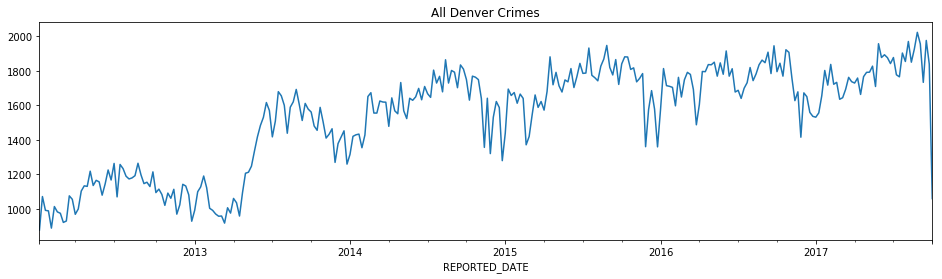

In [251]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 4))
weekly_crimes.plot(title='All Denver Crimes', ax=ax)
fig.savefig('/tmp/c12-crimes.png', dpi=300)

## Aggregating weekly crime and traffic accidents separately

### How to do it...

In [252]:
crime = (pd.read_hdf('data/crime.h5', 'crime') 
    .set_index('REPORTED_DATE') 
    .sort_index()
)

In [253]:
(crime
    .resample('Q')
    ['IS_CRIME', 'IS_TRAFFIC']
    .sum()
)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442
...,...,...
2016-09-30,17427,6199
2016-12-31,15984,6094
2017-03-31,16426,5587


In [254]:
(crime
    .resample('QS')
    ['IS_CRIME', 'IS_TRAFFIC']
    .sum()
)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442
...,...,...
2016-07-01,17427,6199
2016-10-01,15984,6094
2017-01-01,16426,5587


In [255]:
(crime
   .loc['2012-4-1':'2012-6-30', ['IS_CRIME', 'IS_TRAFFIC']]
   .sum()
)

IS_CRIME      9641
IS_TRAFFIC    5255
dtype: int64

In [256]:
(crime
    .groupby(pd.Grouper(freq='Q')) 
    ['IS_CRIME', 'IS_TRAFFIC']
    .sum()
)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442
...,...,...
2016-09-30,17427,6199
2016-12-31,15984,6094
2017-03-31,16426,5587


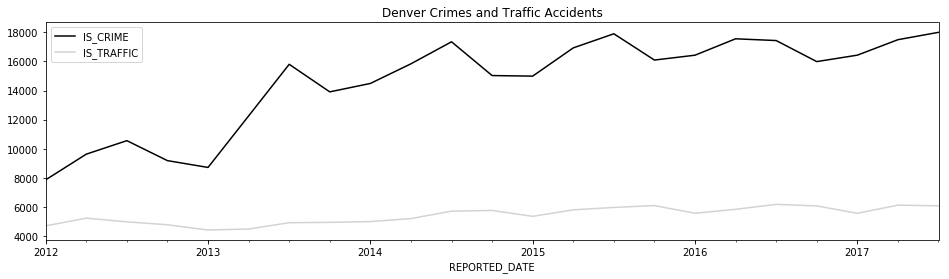

In [257]:
fig, ax = plt.subplots(figsize=(16, 4))
(crime
    .groupby(pd.Grouper(freq='Q')) 
    ['IS_CRIME', 'IS_TRAFFIC']
    .sum()
    .plot(color=['black', 'lightgrey'], ax=ax,
          title='Denver Crimes and Traffic Accidents')
)
fig.savefig('/tmp/c12-crimes2.png', dpi=300)

### How it works...

In [258]:
(crime
    .resample('Q')
    .sum()
)

,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,
2012-03-31,-1.313006...,496960.2...,7882,4726
2012-06-30,-1.547274...,585656.7...,9641,5255
2012-09-30,-1.615835...,611604.8...,10566,5003
2012-12-31,-1.458177...,551923.0...,9197,4802
2013-03-31,-1.368931...,518159.7...,8730,4442
...,...,...,...,...
2016-09-30,-2.459343...,930926.4...,17427,6199
2016-12-31,-2.293628...,868233.8...,15984,6094
2017-03-31,-2.288383...,866234.2...,16426,5587


In [259]:
(crime_sort
    .resample('QS-MAR')
    ['IS_CRIME', 'IS_TRAFFIC'] 
    .sum()
)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2011-12-01,5013,3198
2012-03-01,9260,4954
2012-06-01,10524,5190
2012-09-01,9450,4777
2012-12-01,9003,4652
...,...,...
2016-09-01,16932,6202
2016-12-01,15615,5731
2017-03-01,17287,5940


### There's more...

In [260]:
crime_begin = (crime
    .resample('Q')
    ['IS_CRIME', 'IS_TRAFFIC']
    .sum()
    .iloc[0]
)

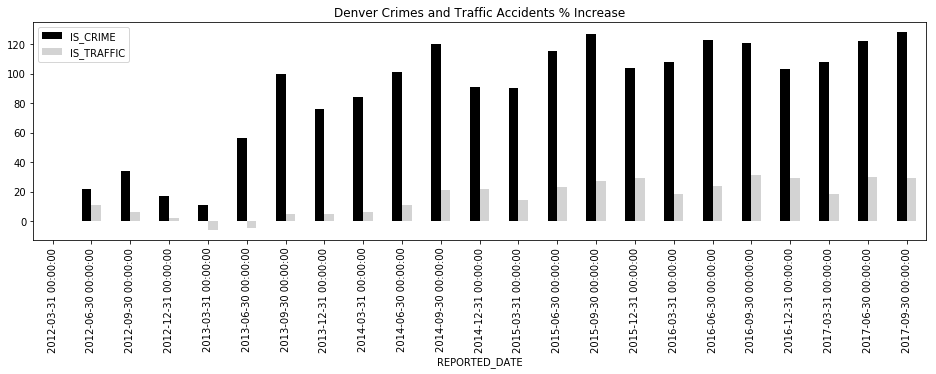

In [261]:
fig, ax = plt.subplots(figsize=(16, 4))
(crime
    .resample('Q')
    ['IS_CRIME', 'IS_TRAFFIC']
    .sum()
    .div(crime_begin)
    .sub(1)
    .round(2)
    .mul(100)
    .plot.bar(color=['black', 'lightgrey'], ax=ax,
          title='Denver Crimes and Traffic Accidents % Increase')
)

In [262]:
fig.autofmt_xdate()
fig.savefig('/tmp/c12-crimes3.png', dpi=300, bbox_inches='tight')

## Measuring crime by weekday and year

### How to do it...

In [263]:
crime = pd.read_hdf('data/crime.h5', 'crime')
crime

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,...,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-...,traffic-...,2014-06-2...,...,cbd,0,1
1,vehicula...,all-othe...,2014-06-2...,...,east-colfax,1,0
2,disturbi...,public-d...,2014-06-2...,...,athmar-park,1,0
3,curfew,public-d...,2014-06-2...,...,sunnyside,1,0
4,aggravat...,aggravat...,2014-06-2...,...,college-...,1,0
...,...,...,...,...,...,...,...
460906,burglary...,burglary,2017-09-1...,...,west-hig...,1,0
460907,weapon-u...,all-othe...,2017-09-1...,...,barnum-west,1,0
460908,traf-hab...,all-othe...,2017-09-1...,...,montbello,1,0
460909,criminal...,public-d...,2017-09-1...,...,skyland,1,0


In [264]:
(crime
   ['REPORTED_DATE']
   .dt.weekday_name 
   .value_counts()
)

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

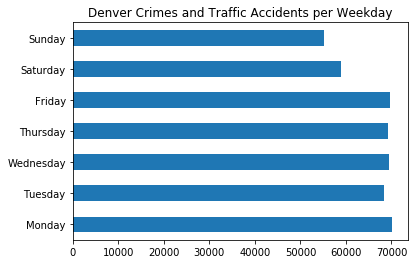

In [265]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
        'Friday', 'Saturday', 'Sunday']
title = 'Denver Crimes and Traffic Accidents per Weekday'
fig, ax = plt.subplots(figsize=(6, 4))
(crime
   ['REPORTED_DATE']
   .dt.weekday_name 
   .value_counts()
   .reindex(days)
   .plot.barh(title=title, ax=ax)
)
fig.savefig('/tmp/c12-crimes4.png', dpi=300, bbox_inches='tight')                 

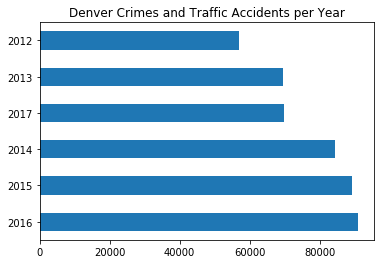

In [266]:
title = 'Denver Crimes and Traffic Accidents per Year'
fig, ax = plt.subplots(figsize=(6, 4))
(crime
   ['REPORTED_DATE']
   .dt.year 
   .value_counts()
   .plot.barh(title=title, ax=ax)
)
fig.savefig('/tmp/c12-crimes5.png', dpi=300, bbox_inches='tight')                 

In [267]:
(crime
    .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
              crime['REPORTED_DATE'].dt.weekday_name.rename('day')])
    .size()
)

year  day      
2012  Friday        8549
      Monday        8786
      Saturday      7442
      Sunday        7189
      Thursday      8440
                   ...  
2017  Saturday      8514
      Sunday        8124
      Thursday     10545
      Tuesday      10628
      Wednesday    10576
Length: 42, dtype: int64

In [268]:
(crime
    .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
              crime['REPORTED_DATE'].dt.weekday_name.rename('day')])
    .size()
    .unstack('day')
)

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


In [269]:
criteria = crime['REPORTED_DATE'].dt.year == 2017
crime.loc[criteria, 'REPORTED_DATE'].dt.dayofyear.max()

272

In [270]:
round(272 / 365, 3)

0.745

In [271]:
crime_pct = (crime
   ['REPORTED_DATE']
   .dt.dayofyear.le(272) 
   .groupby(crime.REPORTED_DATE.dt.year) 
   .mean()
   .round(3)
)

In [272]:
crime_pct

REPORTED_DATE
2012    0.748
2013    0.725
2014    0.751
2015    0.748
2016    0.752
2017    1.000
Name: REPORTED_DATE, dtype: float64

In [273]:
crime_pct.loc[2012:2016].median()

0.748

In [274]:
def update_2017(df_):
    df_.loc[2017] = (df_
        .loc[2017]
        .div(.748) 
        .astype('int')
    )
    return df_
(crime
    .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
              crime['REPORTED_DATE'].dt.weekday_name.rename('day')])
    .size()
    .unstack('day')
    .pipe(update_2017)
    .reindex(columns=days)
)

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
year,,,,,,,
2012,8786,8191,8440,8440,8549,7442,7189
2013,10627,10416,10354,10431,10380,8875,8444
2014,12813,12440,12948,12309,12683,10950,10278
2015,13452,13381,13320,13512,13273,11586,10624
2016,13708,13338,13900,14050,14059,11467,10554
2017,14221,14208,14139,14097,14274,11382,10860


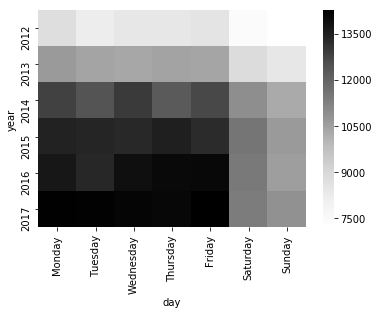

In [275]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 4))
table = (crime
    .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
              crime['REPORTED_DATE'].dt.weekday_name.rename('day')])
    .size()
    .unstack('day')
    .pipe(update_2017)
    .reindex(columns=days)
)
sns.heatmap(table, cmap='Greys', ax=ax)
fig.savefig('/tmp/c12-crimes6.png', dpi=300, bbox_inches='tight')                 

In [276]:
denver_pop = pd.read_csv('data/denver_pop.csv',
    index_col='Year')
denver_pop

,Population
Year,
2017,705000
2016,693000
2015,680000
2014,662000
2013,647000
2012,634000


In [277]:
den_100k = denver_pop.div(100_000).squeeze()
normalized = (crime
    .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
              crime['REPORTED_DATE'].dt.weekday_name.rename('day')])
    .size()
    .unstack('day')
    .pipe(update_2017)
    .reindex(columns=days)
    .div(den_100k, axis='index')
    .astype(int)
)
normalized

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2012,1385,1291,1331,1331,1348,1173,1133
2013,1642,1609,1600,1612,1604,1371,1305
2014,1935,1879,1955,1859,1915,1654,1552
2015,1978,1967,1958,1987,1951,1703,1562
2016,1978,1924,2005,2027,2028,1654,1522
2017,2017,2015,2005,1999,2024,1614,1540


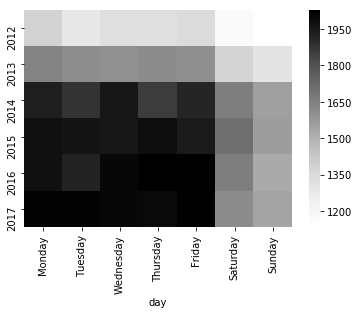

In [278]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(normalized, cmap='Greys', ax=ax)
fig.savefig('/tmp/c12-crimes7.png', dpi=300, bbox_inches='tight')                 

### How it works...

In [279]:
(crime
   ['REPORTED_DATE']
   .dt.weekday_name 
   .value_counts()
   .loc[days]
)

Monday       70024
Tuesday      68394
Wednesday    69538
Thursday     69287
Friday       69621
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

In [280]:
(crime
    .assign(year=crime.REPORTED_DATE.dt.year,
            day=crime.REPORTED_DATE.dt.weekday_name)
    .pipe(lambda df_: pd.crosstab(df_.year, df_.day))
)

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


In [281]:
(crime
    .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
              crime['REPORTED_DATE'].dt.weekday_name.rename('day')])
    .size()
    .unstack('day')
    .pipe(update_2017)
    .reindex(columns=days)
) / den_100k

,2012,2013,2014,...,Thursday,Tuesday,Wednesday
year,,,,,,,
2012,NaN,NaN,NaN,...,NaN,NaN,NaN
2013,NaN,NaN,NaN,...,NaN,NaN,NaN
2014,NaN,NaN,NaN,...,NaN,NaN,NaN
2015,NaN,NaN,NaN,...,NaN,NaN,NaN
2016,NaN,NaN,NaN,...,NaN,NaN,NaN
2017,NaN,NaN,NaN,...,NaN,NaN,NaN


### There's more...

In [282]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday',
        'Friday', 'Saturday', 'Sunday']
crime_type = 'auto-theft'
normalized = (crime
    .query('OFFENSE_CATEGORY_ID == @crime_type')
    .groupby([crime['REPORTED_DATE'].dt.year.rename('year'),
              crime['REPORTED_DATE'].dt.weekday_name.rename('day')])
    .size()
    .unstack('day')
    .pipe(update_2017)
    .reindex(columns=days)
    .div(den_100k, axis='index')
    .astype(int)
)
normalized

day,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2012,95,72,72,76,71,78,76
2013,85,74,74,69,65,68,67
2014,94,76,72,70,76,67,67
2015,108,102,89,101,92,85,78
2016,119,102,100,99,97,86,85
2017,114,118,111,106,111,91,102


## Grouping with anonymous functions with a DatetimeIndex

### How to do it...

In [283]:
crime = (pd.read_hdf('data/crime.h5', 'crime') 
   .set_index('REPORTED_DATE') 
   .sort_index()
)

In [284]:
common_attrs = (set(dir(crime.index)) & 
    set(dir(pd.Timestamp)))
[attr for attr in common_attrs if attr[0] != '_']

['dayofweek',
 'freq',
 'resolution',
 'tz_localize',
 'month_name',
 'is_quarter_start',
 'weekday',
 'microsecond',
 'tz_convert',
 'second',
 'is_month_end',
 'normalize',
 'timetz',
 'is_quarter_end',
 'weekofyear',
 'max',
 'is_year_start',
 'to_pydatetime',
 'round',
 'weekday_name',
 'is_month_start',
 'time',
 'daysinmonth',
 'nanosecond',
 'day_name',
 'to_julian_date',
 'week',
 'is_year_end',
 'day',
 'is_leap_year',
 'minute',
 'dayofyear',
 'to_numpy',
 'tzinfo',
 'ceil',
 'month',
 'to_period',
 'floor',
 'hour',
 'date',
 'strftime',
 'freqstr',
 'year',
 'tz',
 'days_in_month',
 'quarter',
 'min']

In [285]:
crime.index.weekday_name.value_counts()

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

In [286]:
(crime
   .groupby(lambda idx: idx.weekday_name) 
   ['IS_CRIME', 'IS_TRAFFIC']
   .sum()    
)

,IS_CRIME,IS_TRAFFIC
Friday,48833,20814
Monday,52158,17895
Saturday,43363,15516
Sunday,42315,12968
Thursday,49470,19845
Tuesday,49658,18755
Wednesday,50054,19508


In [287]:
funcs = [lambda idx: idx.round('2h').hour, lambda idx: idx.year]
(crime
    .groupby(funcs) 
    ['IS_CRIME', 'IS_TRAFFIC']
    .sum()
    .unstack()
)

IS_CRIME                    ... IS_TRAFFIC                  
       2012  2013  2014  2015  ...       2014  2015  2016  2017
0      2422  4040  5649  5649  ...        978  1136   980   782
2      1888  3214  4245  4050  ...        779   773   718   537
4      1472  2181  2956  2959  ...        424   471   464   313
6      1067  1365  1750  2167  ...        479   494   593   462
8      2998  3445  3727  4161  ...       2210  2331  2372  1828
..      ...   ...   ...   ...  ...        ...   ...   ...   ...
14     4266  5698  6708  7218  ...       2630  2840  2763  1990
16     4113  5889  7351  7643  ...       3002  3160  3527  2784
18     3660  5094  6586  7015  ...       3217  3412  3608  2718
20     3521  4895  6130  6360  ...       1994  2071  2184  1491
22     3078  4318  5496  5626  ...       1532  1671  1472  1072

In [288]:
funcs = [lambda idx: idx.round('2h').hour, lambda idx: idx.year]
(crime
    .groupby(funcs) 
    ['IS_CRIME', 'IS_TRAFFIC']
    .sum()
    .unstack()
    .style.highlight_max(color='lightgrey')
)

### How it works...

## Grouping by a Timestamp and another column

### How to do it...

In [289]:
employee = pd.read_csv('data/employee.csv',
    parse_dates=['JOB_DATE', 'HIRE_DATE'],
    index_col='HIRE_DATE')
employee

,UNIQUE_ID,POSITION_TITLE,DEPARTMENT,...,GENDER,EMPLOYMENT_STATUS,JOB_DATE
HIRE_DATE,,,,,,,
2006-06-12,0,ASSISTAN...,Municipa...,...,Female,Active,2012-10-13
2000-07-19,1,LIBRARY ...,Library,...,Female,Active,2010-09-18
2015-02-03,2,POLICE O...,Houston ...,...,Male,Active,2015-02-03
1982-02-08,3,ENGINEER...,Houston ...,...,Male,Active,1991-05-25
1989-06-19,4,ELECTRICIAN,General ...,...,Male,Active,1994-10-22
...,...,...,...,...,...,...,...
2014-06-09,1995,POLICE O...,Houston ...,...,Male,Active,2015-06-09
2003-09-02,1996,COMMUNIC...,Houston ...,...,Male,Active,2013-10-06
2014-10-13,1997,POLICE O...,Houston ...,...,Male,Active,2015-10-13


In [290]:
(employee
    .groupby('GENDER')
    ['BASE_SALARY']
    .mean()
    .round(-2)
)

GENDER
Female    52200.0
Male      57400.0
Name: BASE_SALARY, dtype: float64

In [291]:
(employee
    .resample('10AS')
    ['BASE_SALARY']
    .mean()
    .round(-2)    
)

HIRE_DATE
1958-01-01     81200.0
1968-01-01    106500.0
1978-01-01     69600.0
1988-01-01     62300.0
1998-01-01     58200.0
2008-01-01     47200.0
Freq: 10AS-JAN, Name: BASE_SALARY, dtype: float64

In [292]:
(employee
   .groupby('GENDER')
   .resample('10AS')
   ['BASE_SALARY'] 
   .mean()
   .round(-2)
)

GENDER  HIRE_DATE 
Female  1975-01-01     51600.0
        1985-01-01     57600.0
        1995-01-01     55500.0
        2005-01-01     51700.0
        2015-01-01     38600.0
                        ...   
Male    1968-01-01    106500.0
        1978-01-01     72300.0
        1988-01-01     64600.0
        1998-01-01     59700.0
        2008-01-01     47200.0
Name: BASE_SALARY, Length: 11, dtype: float64

In [293]:
(employee
   .groupby('GENDER')
   .resample('10AS')
   ['BASE_SALARY'] 
   .mean()
   .round(-2)
   .unstack('GENDER')
)

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1975-01-01,51600.0,NaN
1978-01-01,NaN,72300.0
1985-01-01,57600.0,NaN
...,...,...
1995-01-01,55500.0,NaN
1998-01-01,NaN,59700.0
2005-01-01,51700.0,NaN


In [294]:
employee[employee['GENDER'] == 'Male'].index.min()

Timestamp('1958-12-29 00:00:00')

In [295]:
employee[employee['GENDER'] == 'Female'].index.min()

Timestamp('1975-06-09 00:00:00')

In [296]:
(employee
   .groupby(['GENDER', pd.Grouper(freq='10AS')]) 
   ['BASE_SALARY']
   .mean()
   .round(-2)
)

GENDER  HIRE_DATE 
Female  1968-01-01         NaN
        1978-01-01     57100.0
        1988-01-01     57100.0
        1998-01-01     54700.0
        2008-01-01     47300.0
                        ...   
Male    1968-01-01    106500.0
        1978-01-01     72300.0
        1988-01-01     64600.0
        1998-01-01     59700.0
        2008-01-01     47200.0
Name: BASE_SALARY, Length: 11, dtype: float64

In [297]:
(employee
   .groupby(['GENDER', pd.Grouper(freq='10AS')]) 
   ['BASE_SALARY']
   .mean()
   .round(-2)
   .unstack('GENDER')
)

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1978-01-01,57100.0,72300.0
1988-01-01,57100.0,64600.0
1998-01-01,54700.0,59700.0
2008-01-01,47300.0,47200.0


### How it works...

### There's more...

In [298]:
sal_final = (employee
   .groupby(['GENDER', pd.Grouper(freq='10AS')]) 
   ['BASE_SALARY']
   .mean()
   .round(-2)
   .unstack('GENDER')
)
years = sal_final.index.year
years_right = years + 9
sal_final.index = years.astype(str) + '-' + years_right.astype(str)
sal_final

GENDER,Female,Male
HIRE_DATE,,
1958-1967,NaN,81200.0
1968-1977,NaN,106500.0
1978-1987,57100.0,72300.0
1988-1997,57100.0,64600.0
1998-2007,54700.0,59700.0
2008-2017,47300.0,47200.0


In [299]:
cuts = pd.cut(employee.index.year, bins=5, precision=0)
cuts.categories.values

IntervalArray([(1958.0, 1970.0], (1970.0, 1981.0], (1981.0, 1993.0], (1993.0, 2004.0], (2004.0, 2016.0]],
              closed='right',
              dtype='interval[float64]')

In [300]:
(employee
    .groupby([cuts, 'GENDER'])
    ['BASE_SALARY'] 
    .mean()
    .unstack('GENDER')
    .round(-2)
)

GENDER,Female,Male
"(1958.0, 1970.0]",NaN,85400.0
"(1970.0, 1981.0]",54400.0,72700.0
"(1981.0, 1993.0]",55700.0,69300.0
"(1993.0, 2004.0]",56500.0,62300.0
"(2004.0, 2016.0]",49100.0,49800.0
